# # Importing libraries

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split as tts
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
import seaborn as sns

# using pandas to read csv file

In [2]:
csv =pd.read_csv(r"C:\Users\Admin\Downloads\car data.csv")

# checking the head of data,Selling_Price and Present_Price are in hundred thousand(lakh) for eg 3.35 is 335000

In [3]:
csv.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# removing data which is not required and converting column rows into int

In [4]:
del csv['Car_Name']

In [5]:
Age = 2023 - csv['Year']
csv.insert(1,'Age',Age)

In [6]:
csv = csv.drop('Year', axis=1)

In [7]:
csv['Fuel_Type'].replace({'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4},inplace=True)
csv['Seller_Type'].replace({'Individual':0,'Trustmark Dealer':1,'Dealer':2},inplace=True)
csv['Transmission'].replace({'Manual':0,'Automatic':1},inplace=True)
csv['Owner'].replace({'First Owner':0,'Second Owner':1,'Fourth & Above Owner':3,'Third Owner':2,'Test Drive Car':4},inplace=True)

# using graphs to analyze the data

In [8]:
csv.corr()

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Age,1.000000,-0.236141,0.047584,0.524342,-0.053643,-0.039896,0.000394,0.182104
Selling_Price,-0.236141,1.000000,0.878983,0.029187,0.509467,0.550724,0.367128,-0.088344
Present_Price,0.047584,0.878983,1.000000,0.203647,0.440415,0.512030,0.348715,0.008057
Kms_Driven,0.524342,0.029187,0.203647,1.000000,0.166801,0.101419,0.162510,0.089216
Fuel_Type,-0.053643,0.509467,0.440415,0.166801,1.000000,0.352415,0.080466,-0.055705
Seller_Type,-0.039896,0.550724,0.512030,0.101419,0.352415,1.000000,0.063240,-0.124269
Transmission,0.000394,0.367128,0.348715,0.162510,0.080466,0.063240,1.000000,0.050316
Owner,0.182104,-0.088344,0.008057,0.089216,-0.055705,-0.124269,0.050316,1.000000


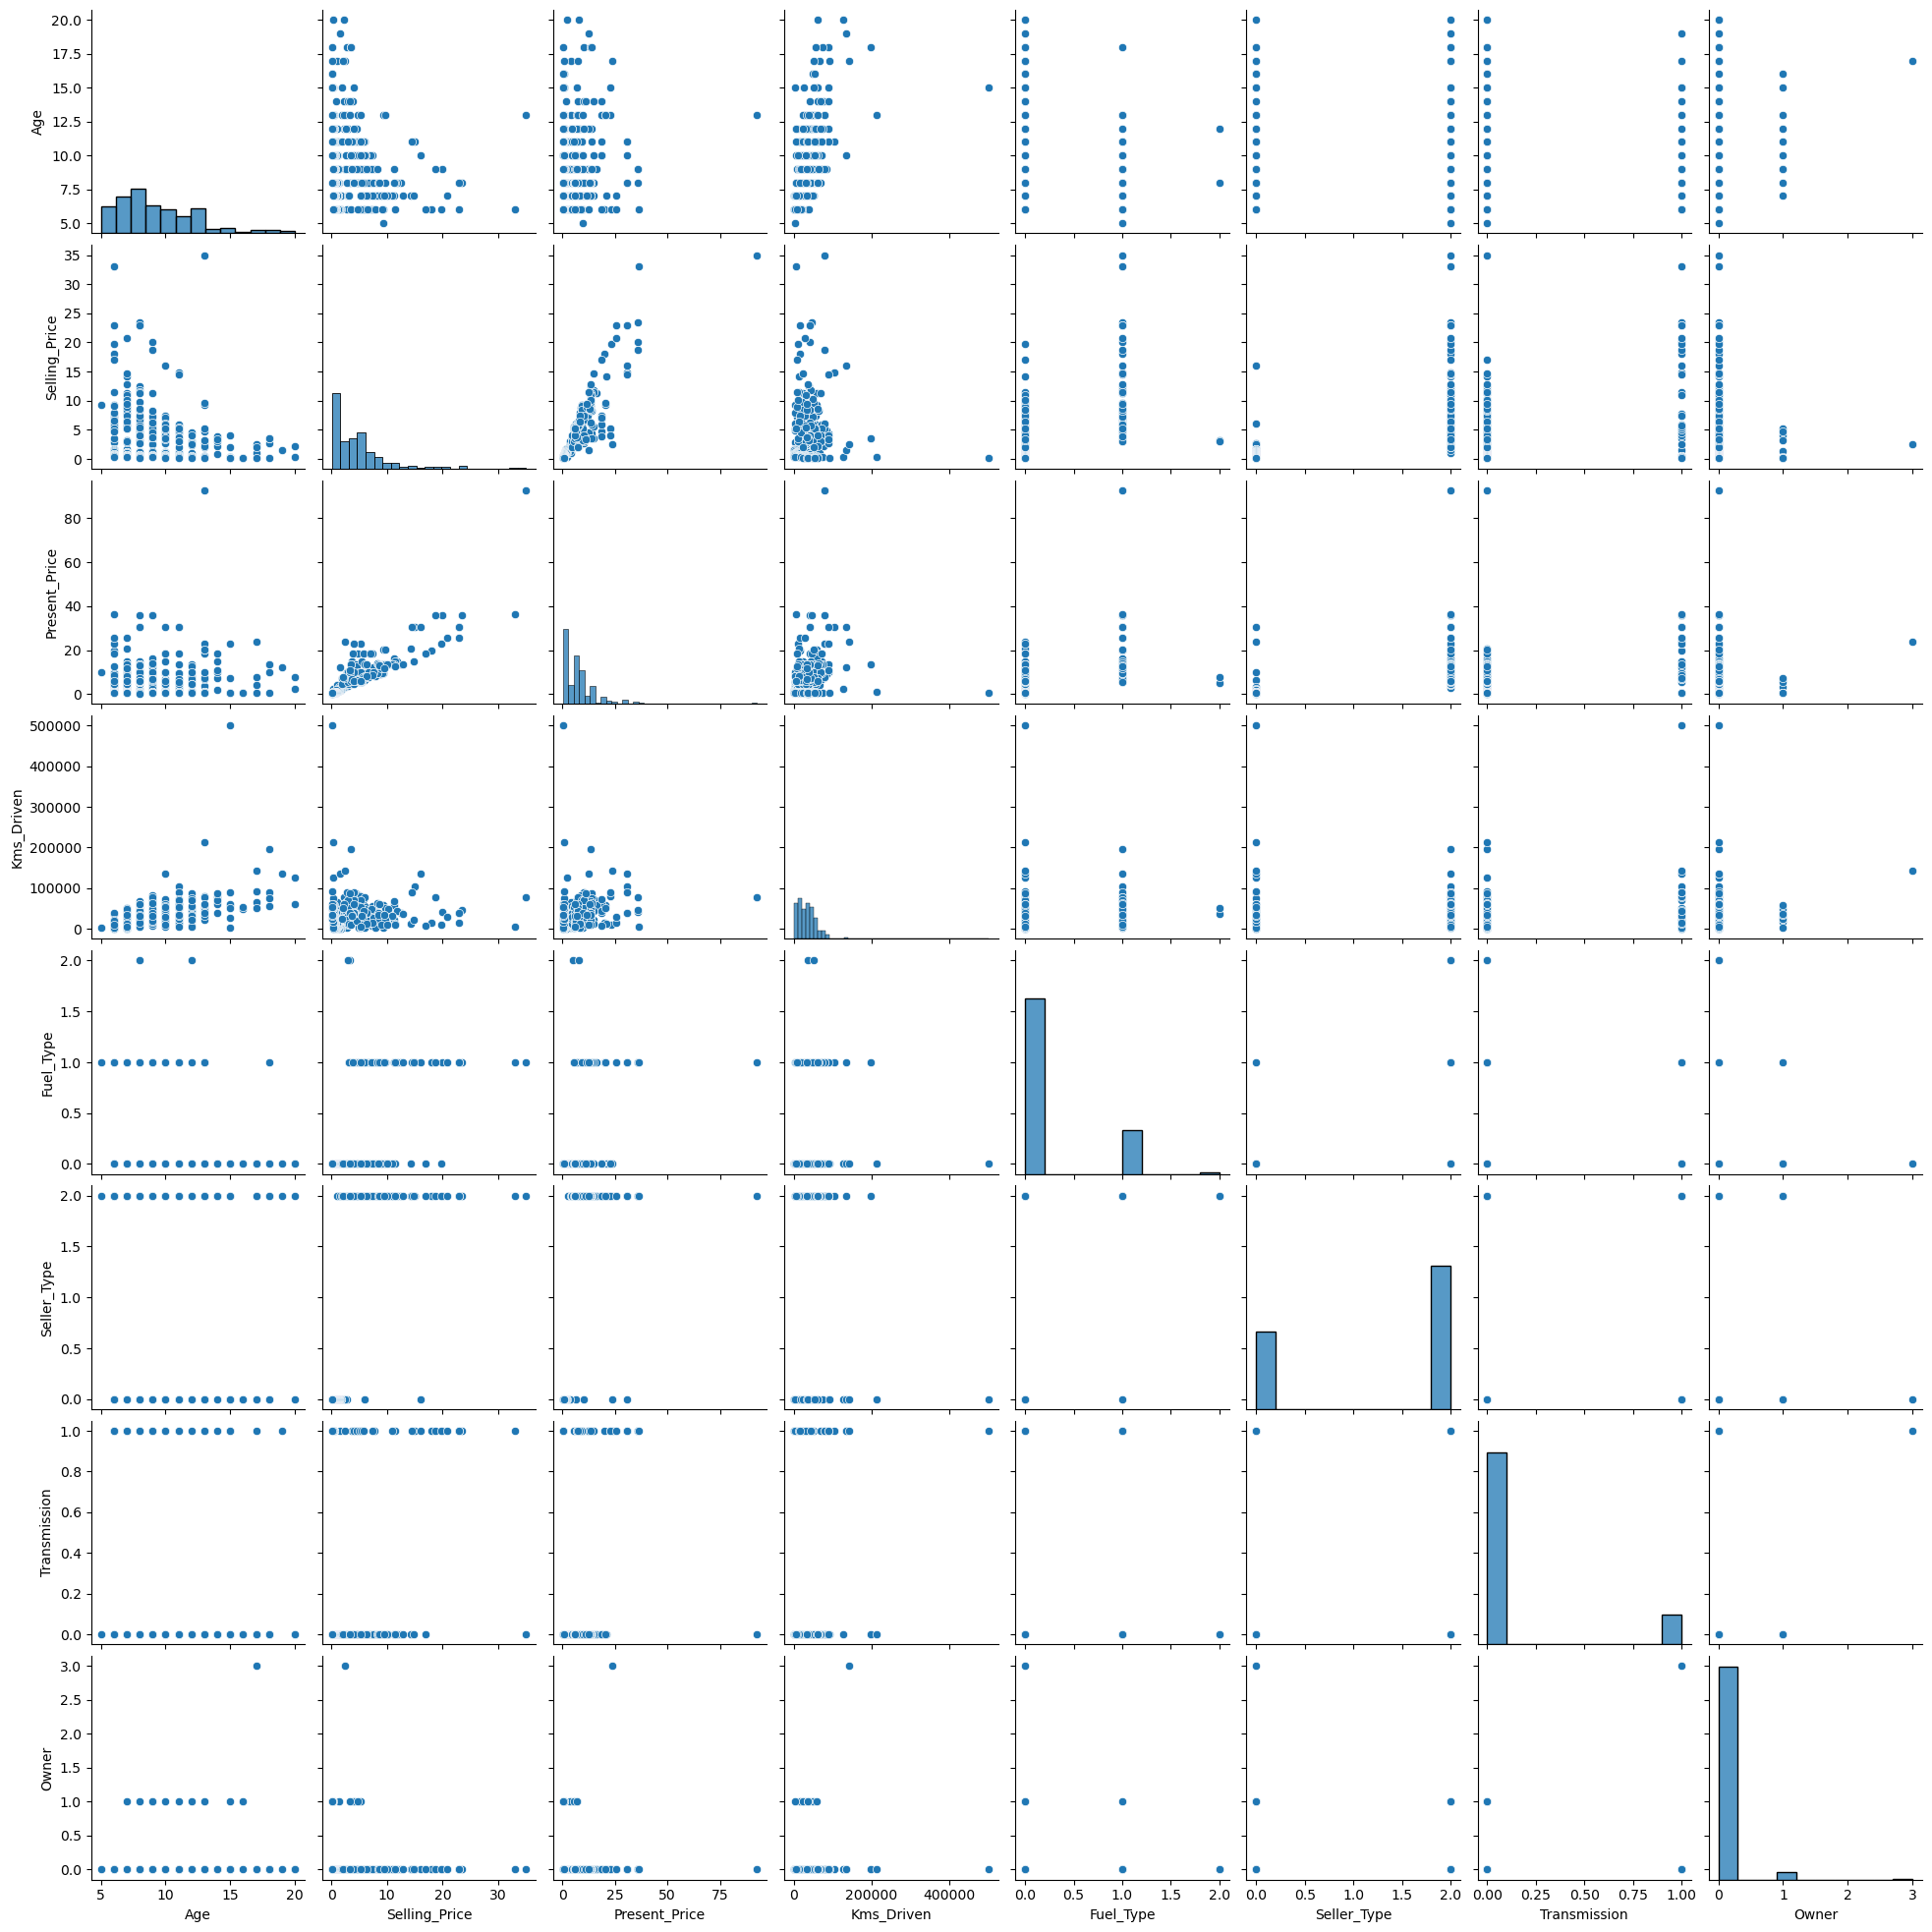

In [9]:
sns.pairplot(csv)

# using boxplot to see outlyers

<Axes: >

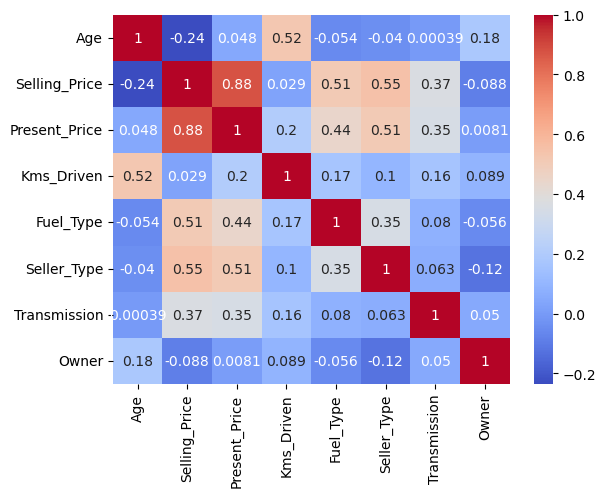

In [10]:
sns.heatmap(csv.corr(),annot=True,cmap='coolwarm')

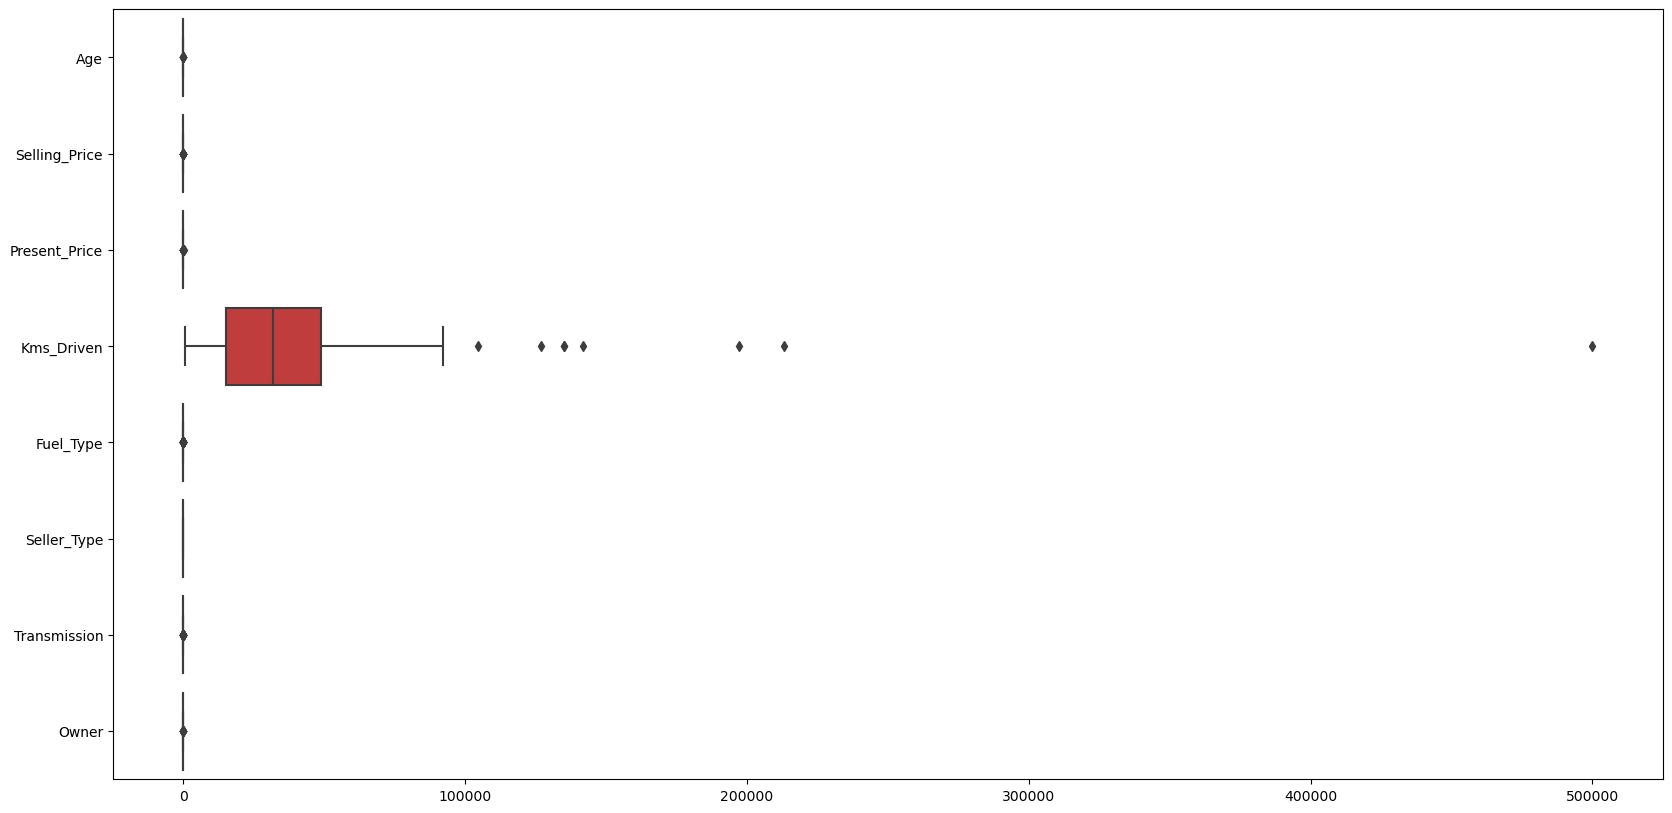

In [11]:
plt.figure(figsize=(20, 10))  
sns.boxplot(data=csv, orient='h') 
plt.show()

# checking total null, information and other details of csv data

In [12]:
csv.isnull().sum()

Age              0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [13]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    int64  
 5   Seller_Type    301 non-null    int64  
 6   Transmission   301 non-null    int64  
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 18.9 KB


In [14]:
csv.describe()

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,9.372093,4.661296,7.628472,36947.205980,0.212625,1.295681,0.132890,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.425801,0.956878,0.340021,0.247915
min,5.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.900000,1.200000,15000.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,3.600000,6.400000,32000.000000,0.000000,2.000000,0.000000,0.000000
75%,11.000000,6.000000,9.900000,48767.000000,0.000000,2.000000,0.000000,0.000000
max,20.000000,35.000000,92.600000,500000.000000,2.000000,2.000000,1.000000,3.000000


In [15]:
csv.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,9,3.35,5.59,27000,0,2,0,0
1,10,4.75,9.54,43000,1,2,0,0
2,6,7.25,9.85,6900,0,2,0,0
3,12,2.85,4.15,5200,0,2,0,0
4,9,4.60,6.87,42450,1,2,0,0


In [16]:
csv.tail(302)

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,9,3.35,5.59,27000,0,2,0,0
1,10,4.75,9.54,43000,1,2,0,0
2,6,7.25,9.85,6900,0,2,0,0
3,12,2.85,4.15,5200,0,2,0,0
4,9,4.60,6.87,42450,1,2,0,0
...,...,...,...,...,...,...,...,...
296,7,9.50,11.60,33988,1,2,0,0
297,8,4.00,5.90,60000,0,2,0,0
298,14,3.35,11.00,87934,0,2,0,0
299,6,11.50,12.50,9000,1,2,0,0


# x is my features(independent feature) and y is my target(dependent feature)

In [17]:
x=csv[['Age','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]
y=csv['Selling_Price']

In [18]:
x.head()

,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,9,5.59,27000,0,2,0,0
1,10,9.54,43000,1,2,0,0
2,6,9.85,6900,0,2,0,0
3,12,4.15,5200,0,2,0,0
4,9,6.87,42450,1,2,0,0


In [19]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

# using train test split to train and test data ,using linear regression model

In [20]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=42)

In [ ]:
model=lr()
model.fit(x_train,y_train)

In [ ]:
y_pred=model.predict(x_test)

# checking the accuracy and error in my test data

In [ ]:
mse = mean_squared_error(y_test,y_pred)
mae= mean_absolute_error(y_test,y_pred)
rmse= np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print(r2)
print(mse)
print(mae)
print(rmse)

In [ ]:
ypred=model.predict(x_train)

In [ ]:
mse = mean_squared_error(y_train,ypred)
mae= mean_absolute_error(y_train,ypred)
rmse= np.sqrt(mse)
r2 = r2_score(y_train,ypred)
print(r2)
print(mse)
print(mae)
print(rmse)

# testing it with new data

In [ ]:
car=np.array([[15,7.55,50000,0,0,0,0]])
price=model.predict(car)
print(price)

# using ridge and lasso to minimize the outlyers ,regularizing the model so it does not become overfit()

In [ ]:
ridge=Ridge(alpha=50,max_iter=100,tol=0.5)
ridge.fit(x_train,y_train)

# ridge accuracy in training

In [ ]:
ridge.score(x_train,y_train)

# ridge accuracy in test

In [ ]:
ridge.score(x_test,y_test)

In [ ]:
from sklearn import linear_model
clf = linear_model.Lasso()
clf.fit(x_train,y_train)

# lasso accuracy in test

In [ ]:
clf.score(x_test,y_test)

# lasso accuracy in training

In [ ]:
clf.score(x_train,y_train)

# Performing hypothesis test using T test

In [ ]:
from scipy.stats import ttest_1samp

In [ ]:
df =pd.read_csv(r"C:\Users\Admin\Downloads\car data.csv")

In [ ]:
Age = 2023 - df['Year']
df.insert(1,'Age',Age)

# age mean is  9.37

In [ ]:
df_mean =np.mean(df['Age'])
print(df_mean)

# Null hypothesis in my data set is that average age of car is 9 or above and my alternate hypothesis is mean is that average age of car is smaller than 9. 
My alpha is 0.05

In [ ]:
alpha = 0.05

# My sample size is 90 and my population size is 301

In [ ]:
sample_size=90
df_sample=df['Age'].sample(n=sample_size)

In [ ]:
ttest,p_value =ttest_1samp(df_sample,9)

# my sample p value is 0.53

In [ ]:
print(p_value)

# Null hypothesis wins because it is not lesser but greater than alpha = 0.05

In [ ]:
if p_value<0.05:
    print('we are rejecting the null value')
else:
    print('we are accepting null value')